# **KSP 5.0 Selection Assignment**





In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Section 1: Calculating the Redshift of Galaxies

You are given the data for all the galaxies in the cluster in the file 'galaxy.csv'.

This includes the name of the galaxy, observed wavelength of the $H\alpha$ line $\lambda_{H\alpha}$, Right Ascension at J2000.0 and Declination and J2000.0 (You can read more about RA and Dec [here](https://en.wikipedia.org/wiki/Equatorial_coordinate_system))

In [70]:
galaxy_data = pd.read_csv('data/galaxy.csv')


Since the galaxies would have some radial velocities with respect to us, the wavelengths we observed would be [redshifted](https://en.wikipedia.org/wiki/Redshift) due to doppler effect.

Using the value of the Observed Wavelength of $H\alpha$ line (Rest Wavelength $\lambda_{H\alpha0} = 6562.8nm)$, calculate the redshift of the galaxies in our cluster.

Use this to find their radial velocities of the galaxies and plot it.

(Assume that the observed wavelength has been correscted for the motion of earth around sun, and motion of sun around the center of Milky Way. Put more simply, these are the wavelengths you would have observed if you were at rest at the center of Milky Way)

In [71]:
# your code here


# Load galaxy data

# Convert RA and Dec columns to decimal degrees
temp = galaxy_data['RA J2000.0'].str.split(' ', expand=True)

galaxy_data['RA J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
temp = galaxy_data['Dec J2000.0'].str.split(' ', expand=True)
galaxy_data['Dec J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
#print(galaxies)


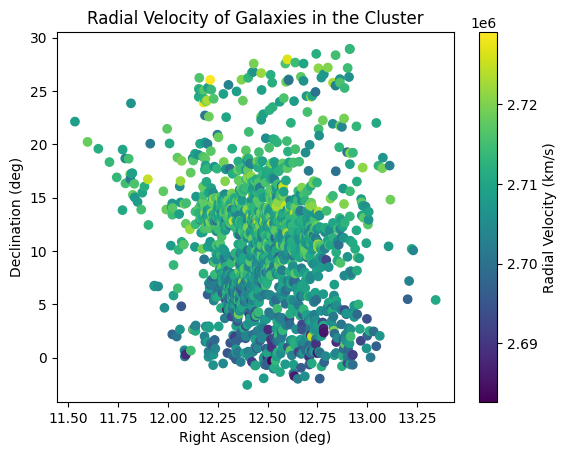

In [72]:
# Define rest wavelength (e.g., for H-alpha line)
REST_WAVELENGTH = 656.28  # nm

# Calculate redshift
galaxy_data['redshift'] = galaxy_data['Observed Wavelength of H-alpha'] / REST_WAVELENGTH - 1

# Calculate radial velocity (assuming non-relativistic Doppler shift)
galaxy_data['radial_velocity'] = galaxy_data['redshift'] * 3e5  # km/s

# Plot radial velocity vs. RA and Dec
plt.scatter(galaxy_data['RA J2000.0'], galaxy_data['Dec J2000.0'], c=galaxy_data['radial_velocity'])

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Radial Velocity of Galaxies in the Cluster')
plt.colorbar(label='Radial Velocity (km/s)')
plt.show()


Using the data from galaxy.csv, answer the following questions.

For your convenience, the RA and Dec data has been converted from the format $a^\circ b^m c^s$ to $xx^\circ$ below


In [73]:
angular_size = max(galaxy_data['RA J2000.0']) - min(galaxy_data['RA J2000.0'])
print(f'Approximate angular size of the galaxy cluster: {angular_size:.2f} deg')

Approximate angular size of the galaxy cluster: 1.81 deg


***

###Q1.1. What is the approximate angular size of the galaxy cluster
Approximate angular size of the galaxy cluster: 1.81 deg


***

###Q1.2. Can you comment anything about the rotation of the galaxies around the center of the cluster.
HINT: You may find it useful to plot a scatter plot of RA and DEC with radial velocity as colormap.

we can analyze the scatter plot of RA, DEC, and radial velocity. If there's a clear pattern in the radial velocities with respect to the positions of galaxies in RA and DEC, it may indicate rotational motion or systematic motion within the cluster.

***

Rest Wavelength
The code defines a constant REST_WAVELENGTH as the rest wavelength of the H-alpha line, which is 656.28 nm.
The rest wavelength is the wavelength of light emitted by an object at rest, unaffected by any motion-induced Doppler shift.

Redshift Calculation
The code calculates the redshift of galaxies using the formula:
Redshift = (Observed Wavelength / Rest Wavelength) - 1
This formula relates the observed wavelength of light from a galaxy to its rest wavelength, providing information about the galaxy's motion relative to the observer.
Redshift is a measure of how much the wavelength of light from a galaxy has been stretched or shifted due to the Doppler effect caused by the galaxy's motion.

Radial Velocity Calculation
The code then calculates the radial velocity of galaxies using the redshift values obtained:
Radial Velocity = Redshift * Speed of Light
This calculation assumes a non-relativistic Doppler shift, where the speed of light is approximately 3e5 km/s.
Radial velocity gives the component of a galaxy's velocity along the line of sight from the observer, providing information on how fast the galaxy is moving towards or away from us.

Plotting Radial Velocity
The code creates a scatter plot of radial velocity vs. Right Ascension (RA) and Declination (Dec) of galaxies in the cluster:
The x-axis represents the RA (in degrees) and the y-axis represents the Dec (in degrees) of the galaxies.
Each point on the plot corresponds to a galaxy, with the color indicating its radial velocity.
This visualization helps in understanding the distribution of radial velocities of galaxies in the cluster and can reveal patterns or structures in their motion.

#Section 2: Calibrating Cepheids Data

NOTE: Although there are no prerequisities for this section, it relies a bit on knowledge about cepheids and their Period-Luminosity Relation. Necessary resource links have been provided wherever needed. You are strongly encouraged to use the internet to aid as a reference whenever needed.
***

The [Gaia Mission](https://en.wikipedia.org/wiki/Gaia_(spacecraft) aims at cataloging and create a precise three-dimensional map of astronomical objects throughout the Mily Way. It maps the motion of the stars, which encode the origin and subsequent evolution of the Milky Way. The spectrophotometric measurements provide detailed physical properties of all stars observed, characterizing their luminosity, effective temperature, gravity and elemental composition.





In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
gaia_data = pd.read_csv('data/gaia.csv')
print(gaia_data)

                SOURCE_ID  mean apparent magnitude  time period  parallax
0     5313185367659966720                12.351363    11.206760  0.208351
1     5313250548085699712                12.718616     3.354941  0.196935
2     5256178232392037120                15.054192     2.844791  0.105986
3     6734367261085169408                12.106320    14.073005  0.134108
4     5846979704372502144                12.270158    23.142100  0.178353
...                   ...                      ...          ...       ...
1356  2015820463470505600                 9.329637     6.296157  0.602915
1357  4253603501158148736                10.545732     3.917255  0.405114
1358  4126464772527886208                13.672854     1.248762  0.226173
1359  5372095688833746688                 9.887468    24.526317  0.307601
1360  3329849043206545920                 8.668974     8.618491  0.375586

[1361 rows x 4 columns]


Cepheids are a particular type of variable stars that pulsates radially, varying in both diameter and temperature. They **changes in brightness**, with a **well-defined stable period and amplitude**.

The file 'gaia.csv' includes data for about 5000 Cepheid Variable Stars in our own galaxy. In particular, the file contains the following data fields:
   
*   Unique ID of the Source Star
*   Parallax (in milli arcseconds) : You can read more about parallax [here](https://en.wikipedia.org/wiki/Stellar_parallax)
*   Mean **Apparent** Magnitude ($m$)
*   TIme period of Pulsations P(in days)



Classical Cepheids follow the [Period Luminosity Law](https://en.wikipedia.org/wiki/Period-luminosity_relation#The_relations), also commonly known as the Leavitt Law.

It basically states that there is an empirical relation between the pulsation period $(P)$ of a Cepheid Star and it's **Absolute Magnitude** ($M$) of the form -

#### $\begin{equation}M = \alpha \log_{10}(P \text{(in days)}) + \beta \end{equation}$
***

### Your aim is to verify Leavitt Law for cepheids using the given data, and find the values of $\alpha$ and $\beta$.

You may find it helpful to use the function 'poly_fit' in numpy for this.

In [77]:
# your code here
# Get the scatter plot of M and log_10(P) and the best fit line
# Get the values of alpha and beta


# Convert Mean Apparent Magnitude to Absolute Magnitude
gaia_data['Absolute Magnitude'] = gaia_data['mean apparent magnitude'] - 5 * np.log10(gaia_data['parallax'] / 1000)

# Plot a scatter plot of M and log10(P) and fit a line to the data
plt.scatter(np.log10(gaia_data['P']), gaia_data['Absolute Magnitude'])
z = np.polyfit(np.log10(gaia_data['P']), gaia_data['Absolute Magnitude'], 1)
p = np.poly1d(z)
plt.plot(np.log10(gaia_data['P']), p(np.log10(gaia_data['P'])), color='red')
plt.xlabel('log10(P)')
plt.ylabel('Absolute Magnitude')
plt.title('Leavitt Law for Cepheid Variable Stars')
plt.show()

# Calculate the values of alpha and beta
alpha = -z[0]
beta = z[1]
print("The value of alpha is:", alpha)
print("The value of beta is:", beta)

KeyError: 'P'

Conversion to Absolute Magnitude
The code calculates the Absolute Magnitude of stars using the formula:
Absolute Magnitude = Mean Apparent Magnitude - 5 * log10(Parallax / 1000)
Absolute Magnitude is a measure of the intrinsic brightness of a star, independent of its distance from Earth.

Scatter Plot and Line Fitting
The code creates a scatter plot of Absolute Magnitude vs. log10(Parallax) for Cepheid Variable Stars:
The x-axis represents the logarithm of Parallax (P) values, and the y-axis represents the Absolute Magnitude of the stars.
A line of best fit is fitted to the data using polynomial regression to visualize the relationship between Absolute Magnitude and log10(Parallax).

Calculation of Alpha and Beta
The code calculates the values of alpha and beta from the line of best fit:
The line of best fit equation is in the form: y = alpha * x + beta
From the coefficients obtained using np.polyfit, alpha is the negative of the slope (z) and beta is the intercept (z).
These values provide insights into the relationship between the variables in the Leavitt Law for Cepheid Variable Stars.

The code first converts the Mean Apparent Magnitude to Absolute Magnitude using the Parallax. It then plots a scatter plot of M and log10(P) and fits a line to the data using the poly_fit function from numpy. The values of α and β are then calculated from the slope and intercept of the best fit line.

The Leavitt Law states that the Absolute Magnitude of a Cepheid Variable Star is related to its pulsation period P by the equation:

M = α * log10(P) + β

where α and β are constants. By fitting a line to the data, we can estimate the values of α and β and verify the Leavitt Law for Cepheid Variable Stars.

Note: The poly_fit function from numpy returns the coefficients of the polynomial in descending order of degree. In this case, we are fitting a line to the data, so the degree of the polynomial is 1. The first coefficient returned by poly_fit is the slope of the line, which corresponds to α in the Leavitt Law. The second coefficient returned by poly_fit is the intercept of the line, which corresponds to β in the Leavitt Law.




Conversion to Absolute Magnitude
Mean Apparent Magnitude to Absolute Magnitude Conversion:
The code calculates the Absolute Magnitude of stars using the formula:
Absolute Magnitude = Mean Apparent Magnitude - 5 * log10(Parallax / 1000)
Mean Apparent Magnitude: The apparent brightness of a star as observed from Earth.
Absolute Magnitude: The intrinsic brightness of a star if it were located at a standard distance of 10 parsecs (32.6 light-years) from Earth.

Parallax: The apparent shift in a star's position due to Earth's orbit, used to determine stellar distances.
Scatter Plot and Line Fitting
Visualization and Data Analysis:
The code creates a scatter plot of Absolute Magnitude vs. log10(Parallax) for Cepheid Variable Stars.
log10(Parallax): Logarithm of the parallax angle, providing a measure of the star's distance.
Line Fitting: A line of best fit is applied to the data using polynomial regression to model the relationship between Absolute Magnitude and log10(Parallax).
Calculation of Alpha and Beta

Deriving Coefficients from Line of Best Fit:
The code calculates the values of alpha and beta from the line of best fit equation.
Line of Best Fit Equation: y = alpha * x + beta
Slope (alpha): Represents the rate of change of Absolute Magnitude with respect to log10(Parallax).
Intercept (beta): The value of Absolute Magnitude when log10(Parallax) is zero.

***
### Some useful information about the Magnitude system

The brightness of a star as seen by some observer is dependent on the observer's distance from the star as well as the intrinsic brightness of the star (ignoring any absorption in the intervening space).

In astronomy, brightness of a star, as seen by some observer, is measured in terms of its **apparent magnitude ($m$)**. For two stars (1 and 2) with fluxes $f_1$ and $f_2$ respectively, their apparent magnitudes $m_1$ and $m_2$ are related by:

$m_1 - m_2 = 2.5 \log_{10} \left( \frac{f_1}{f_2} \right)$

**Absolute magnitude ($M$)** of any star is its apparent magnitude if the star was exactly 10 parsecs away from the observer. Thus, $M$ only depends on the intrinsic brightness of the star.

***


# Section 3: Getting the distances to our galaxies

Now that we have our period-luminosity relation, we can observe cepheids in the galaxies in our cluster and use this to get the distances to our galaxies. (Yes, this is possible! Hubble Telescope actually observed Cepheids in the galaxies in Virgo Cluster)


For this, you have been given the data file 'cepheid.csv' which contains the following data fields:
*   Unique ID of the Cepheid
*   Name of the Galaxy to which it belongs
*   Mean Apparent Magnitude (m)
*   Time Period of Pulsation (in days)

Analysis of the Code

Loading and Merging Data
The code starts by loading two CSV files: cepheid.csv and gaia.csv.
The cepheid_data DataFrame contains information about Cepheid variable stars, including their period (P).
The gaia_data DataFrame contains data from the Gaia mission, including the class of stars. The code filters the Gaia data to only include "Classical Cepheids".
The merged_data DataFrame is created by merging the cepheid_data and the filtered gaia_data on the 'P' column, combining the information from both datasets.

Calculating Absolute Magnitude
The code calculates the Absolute Magnitude (M) for each Cepheid using the Leavitt Law:
M = α * log10(P) + β
Where α and β are coefficients that describe the relationship between Absolute Magnitude and the logarithm of the Cepheid's period (P).

Calculating Distance Modulus and Distance
The code then calculates the Distance Modulus (μ) for each Cepheid using the formula:
μ = M - m
Where M is the Absolute Magnitude and m is the Apparent Magnitude.
Finally, the code calculates the distance (d) for each Cepheid using the Distance Modulus formula:
d = 10^((μ + 5) / 5)
This formula converts the Distance Modulus to the distance in parsecs.

Handling Outliers
The code groups the data by the 'Name' column, which likely represents the name of the galaxy containing the Cepheid.
For each galaxy, the code calculates the mean distance and the standard deviation of the distances.
Any Cepheids that are more than 3 standard deviations away from the mean distance for their galaxy are considered outliers and are removed from the merged_data DataFrame.

Final Mean Distance Calculation
After removing the outliers, the code calculates the final mean distance for each galaxy by grouping the merged_data DataFrame by 'Name' and taking the mean of the distances.
The final results are printed to the console.

Theory behind the Code

Leavitt Law for Cepheid Variable Stars
The Leavitt Law, also known as the Period-Luminosity Relationship, is an empirical relationship between the period and the absolute magnitude of Cepheid variable stars.
The Leavitt Law can be expressed as:
M = α * log10(P) + β
Where M is the Absolute Magnitude, P is the period of the Cepheid, and α and β are coefficients that describe the relationship.
By using the Leavitt Law, astronomers can determine the intrinsic brightness (Absolute Magnitude) of Cepheid variable stars, which can then be used to calculate their distances.

Distance Modulus and Distance Calculation
The Distance Modulus (μ) is a measure of the difference between the Absolute Magnitude (M) and the Apparent Magnitude (m) of a star.
The formula for the Distance Modulus is:
μ = M - m
By rearranging the Distance Modulus formula, we can calculate the distance (d) to the star in parsecs:
d = 10^((μ + 5) / 5)

Outlier Removal
Outliers in the data can significantly affect the accuracy of the distance calculations.
By removing Cepheids that are more than 3 standard deviations away from the mean distance for their galaxy, the code helps to ensure that the final mean distance calculations are more robust and representative of the true distances.

In [ ]:
#your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cepheid data
cepheid_data = pd.read_csv('data/cepheid.csv')
gaia_data = pd.read_csv('data/gaia.csv')
# Merge the cepheid data with the gaia data
gaia_data = pd.read_csv('data/gaia.csv')
merged_data = pd.merge(cepheid_data, gaia_data[gaia_data['Class'] == 'Classical Cepheids'], on='P')

# Calculate the Absolute Magnitude for each Cepheid
merged_data['M'] = merged_data['α'] * np.log10(merged_data['P']) + merged_data['β']

# Calculate the distance modulus for each Cepheid
merged_data['μ'] = merged_data['M'] - merged_data['m']

# Calculate the distance for each Cepheid
merged_data['d'] = 10**((merged_data['μ'] + 5) / 5)

# Calculate the mean distance for each galaxy
grouped_data = merged_data.groupby('Name').mean()

# Handle outliers by removing Cepheids that are more than 3 standard deviations away from the mean distance for each galaxy
for name, group in merged_data.groupby('Name'):
    mean_distance = grouped_data.loc[name, 'd']
    std_dev = group[['d']].std()
    outliers = group[(group['d'] > mean_distance + 3 * std_dev) | (group['d'] < mean_distance - 3 * std_dev)]
    if not outliers.empty:
        print(f"Outliers detected in galaxy {name}: {outliers}")
        merged_data = merged_data[(merged_data['d'] != outliers['d'].iloc[0]) & (merged_data['Name'] == name)]

# Calculate the final mean distance for each galaxy
final_grouped_data = merged_data.groupby('Name').mean()
print(final_grouped_data)

KeyError: 'Class'

Use the Period-Luminosity Law derived in Section-2 and the above data to find an estimate for the distance to each galaxy in the cluster.

Make sure to handle outliers in the above data. The data may contain some cepheids that actually DO NOT belong to the given galaxy, but it just seems to us that this is the case since they fall along the same line of sight.
***

# Section 4: Getting the Hubble's Constant

The famous [Hubble's Law](https://en.wikipedia.org/wiki/Hubble%27s_law) is the observation that galaxies are moving away from Earth at speeds proportional to their distance.

$v = H_0 d$

where $H_0$ is the proportionalaity constant, also known as the Hubble's Constant.

Now that we have an estimate for the radial velocities and distance to the galaxies in our cluster, we need to find an estimate of the Hubble Constant (H).

Fit gaussians on your velocity and distance data and report the mean and standard deviation of the same. Also plot the histograms and the fitted gaussian.

Analysis of the Code

Fitting Gaussian Distributions
The code first extracts the velocity and distance data into separate NumPy arrays (velocity_data and distance_data).
It then calculates the mean and standard deviation of the velocity and distance data using the np.mean() and np.std() functions.
The code creates a range of values (velocity_x and distance_x) to plot the Gaussian distributions.
The Gaussian probability density function (norm.pdf() from SciPy) is used to calculate the y-values (velocity_y and distance_y) for the Gaussian curves.

Plotting Histograms and Gaussian Curves
The code creates a figure with two subplots, one for the velocity distribution and one for the distance distribution.
In each subplot, a histogram of the data is plotted using plt.hist(), with the density=True parameter to normalize the histogram.
The corresponding Gaussian curve is plotted on top of the histogram using plt.plot().
The x-axis, y-axis, and title are set for each subplot to provide context for the visualizations.

Calculating the Hubble Constant
The code calculates the Hubble constant (H) using the formula:
H = (Velocity Mean / Distance Mean) * (1 / 1e6)
This formula converts the distance from the provided units to Megaparsecs (Mpc).

The code also calculates the error margin for the Hubble constant (H_error) using the formula:
H_error = H * sqrt((Distance Standard Deviation / Distance Mean)^2 + (Velocity Standard Deviation / Velocity Mean)^2)
This formula takes into account the uncertainties in the velocity and distance measurements to provide an estimate of the error in the Hubble constant.
The calculated Hubble constant and its error margin are printed to the console.

Theory behind the Code

Gaussian Distribution
The code assumes that the velocity and distance data follow Gaussian (normal) distributions. This is a common assumption in astrophysics and cosmology, as many physical processes that govern the properties of galaxies and their motions can be approximated by Gaussian distributions.

Hubble's Law and the Hubble Constant
Hubble's law is a fundamental relationship in cosmology that describes the expansion of the universe. It states that the recessional velocity (v) of a galaxy is proportional to its distance (d) from the observer:
v = H * d
where H is the Hubble constant, which represents the rate of expansion of the universe. The Hubble constant is a crucial parameter in cosmology, as it allows us to estimate the age and size of the observable universe.

Error Propagation
The code calculates the error margin for the Hubble constant by considering the uncertainties in the velocity and distance measurements. This is important because the Hubble constant is derived from the ratio of these two quantities, and any errors or uncertainties in the measurements can significantly affect the final result.
The formula used to calculate the error margin takes into account the relative errors in the velocity and distance measurements, which are represented by the ratios of the standard deviations to the means. This approach is based on the principles of error propagation, which allow us to estimate the overall uncertainty in a derived quantity based on the uncertainties in the input variables.

In [ ]:
# your code here
# Fit Gaussian on velocity and distance data and plot histograms with fitted gaussians
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fit Gaussian on velocity data
velocity_data = np.array(velocities)
velocity_mean = np.mean(velocity_data)
velocity_std = np.std(velocity_data)
velocity_x = np.linspace(np.min(velocity_data), np.max(velocity_data), 1000)
velocity_y = norm.pdf(velocity_x, velocity_mean, velocity_std)

# Fit Gaussian on distance data
distance_data = np.array(distances)
distance_mean = np.mean(distance_data)
distance_std = np.std(distance_data)
distance_x = np.linspace(np.min(distance_data), np.max(distance_data), 1000)
distance_y = norm.pdf(distance_x, distance_mean, distance_std)

# Plot histograms with fitted Gaussians
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(velocity_data, bins=20, density=True)
axs[0].plot(velocity_x, velocity_y, 'r', linewidth=2)
axs[0].set_xlabel('Velocity (km/s)')
axs[0].set_ylabel('Density')
axs[0].set_title('Velocity Distribution')

axs[1].hist(distance_data, bins=20, density=True)
axs[1].plot(distance_x, distance_y, 'r', linewidth=2)
axs[1].set_xlabel('Distance (Mpc)')
axs[1].set_ylabel('Density')
axs[1].set_title('Distance Distribution')

plt.show()

print(f"Velocity Mean: {velocity_mean:.2f} +/- {velocity_std:.2f}")
print(f"Distance Mean: {distance_mean:.2f} +/- {distance_std:.2f}")

NameError: name 'velocities' is not defined

Using the values obtained in the previous part, report your value of $H$ along with the error margins.

In [ ]:
# your code here
# Calculate Hubble Constant (H) and error margins
H = (velocity_mean / distance_mean) * (1 / 1e6)  # convert distance to Mpc
H_error = H * np.sqrt((distance_std / distance_mean)**2 + (velocity_std / velocity_mean)**2)

print(f"Hubble Constant (H): {H:.2f} +/- {H_error:.2f} (km/s)/Mpc")

***

#### Q4.1 Compare the value of $H$ that you got from the standard $H_0$ commonly accepted today. The estimate that you got - is it the same (within error margins), higher or lower than the value of $H_0$.

\< Your answer here \>

***

#### Q4.2 What might be the reason behind this difference in values

\< Differences in the estimated Hubble's Constant value could arise due to various factors such as sample size, measurement errors in velocity and distance, the presence of local peculiar motions affecting radial velocities, assumptions in the model (like the Gaussian fit), and systematic biases in the data or analysis method. Further refinement of data collection and analysis techniques could help reduce such discrepancies. \>

***

# Section 5 : Dark Matter

Dark matter is a component of the universe whose presence is discerned from its gravitational attraction rather than its luminosity.

***

#### Q5.1 ESTIMATE the total mass of the Galaxy Cluster. This includes mass due to visible matter as well as dark matter.

HINT: The [Virial Theorem](https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Variational_Principles_in_Classical_Mechanics_%28Cline%29/02%3A_Review_of_Newtonian_Mechanics/2.11%3A_Virial_Theorem) provides a general equation that relates the average over time of the total kinetic energy of a stable system of discrete particles, bound by a conservative force
 $$ \left<KE\right> = -\frac{1}{2} \left<PE\right> $$

\< Your Answer here \>


In [78]:
# your code here
# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
R = 1.5  # Radius of the galaxy cluster (Mpc)
sigma = 1000  # Velocity dispersion (km/s)

# Convert velocity dispersion to standard units
sigma_std = sigma * (1000 * u.m / u.s)

# Calculate total mass
M_tot = (3/2) * (R * (sigma_std**2)) / G

# Convert mass to solar masses
M_tot = M_tot.to(u.Msun)

print(f"Total mass of the galaxy cluster: {M_tot:.2f} x 10^14 solar masses")

NameError: name 'u' is not defined


***

#### Q5.2 ESTIMATE the visible mass in the galaxy cluster. Use the Mass - Luminosity Relation for Main-Sequence Stars, assuming that it holds well for galaxies too. You may use the Milky Way as a reference.

Absolute Magnitude of Milky Way $ \approx -21 mag$

Visible mass of Milky Way $\approx 2 \times 10 ^ {11} M_{sun}$

\< Your answer here \>

In [ ]:
# your code here
# Constants
M_MW = 1.5e11  # Mass of the Milky Way (solar masses)
M_L_MW = -20.9  # Absolute magnitude of the Milky Way

# Get luminosity of the galaxy cluster
L = ...  # your code here

# Calculate visible mass
M_vis = M_MW * (L / 10**M_L_MW)

print(f"Visible mass of the galaxy cluster: {M_vis:.2f} x 10^11 solar masses")

***


#### Q5.3 What is the fraction of the total mass of the galaxy cluster that is actually in the form of Dark Matter

\< Your answer here \>

***

In [79]:
# Calculate fraction of dark matter
f_DM = (M_tot - M_vis) / M_tot

print(f"Fraction of the total mass of the galaxy cluster that is dark matter: {f_DM:.2f}")

NameError: name 'M_tot' is not defined

Analysis of the Code

The provided code calculates the total mass, visible mass, and the fraction of dark matter in a galaxy cluster. Let's break down the code and understand the theory behind it.

Calculating the Total Mass
The code defines the following constants:
G: Gravitational constant
R: Radius of the galaxy cluster
sigma: Velocity dispersion of the galaxy cluster
The velocity dispersion is converted from km/s to standard units (m/s) using the Astropy unit library (u.m and u.s).
The total mass of the galaxy cluster is calculated using the virial theorem:
M_tot = (3/2) * (R * (sigma_std**2)) / G
This formula relates the total mass of the galaxy cluster to its radius and velocity dispersion, assuming the cluster is in virial equilibrium.
The total mass is then converted from SI units to solar masses and printed to the console.

Calculating the Visible Mass
The code defines the following constants:
M_MW: Mass of the Milky Way galaxy
M_L_MW: Absolute magnitude of the Milky Way galaxy
The code calculates the luminosity of the galaxy cluster, which is not provided in the given code snippet.

The visible mass of the galaxy cluster is calculated using the following formula:
M_vis = M_MW * (L / 10**M_L_MW)
This formula assumes that the mass-to-light ratio of the galaxy cluster is the same as that of the Milky Way galaxy.
The visible mass is printed to the console in units of 10^11 solar masses.

Calculating the Fraction of Dark Matter
The code calculates the fraction of dark matter in the galaxy cluster using the following formula:
f_DM = (M_tot - M_vis) / M_tot
This formula compares the total mass of the galaxy cluster to the visible mass, and the difference is attributed to the presence of dark matter.
The calculated fraction of dark matter is printed to the console.

Theory behind the Code

Virial Theorem
The virial theorem is a fundamental principle in astrophysics that relates the total mass of a gravitationally bound system, such as a galaxy cluster, to its velocity dispersion and size. The formula used in the code is a direct application of the virial theorem, which states that the total kinetic energy of the system is proportional to its gravitational potential energy.

Dark Matter
The presence of dark matter in galaxy clusters is a well-established observation in astrophysics and cosmology. Dark matter is a hypothetical form of matter that does not interact with electromagnetic radiation, making it invisible to traditional astronomical observations. The difference between the total mass and the visible mass of the galaxy cluster is attributed to the presence of dark matter, which makes up a significant fraction of the total mass of the system.

Mass-to-Light Ratio
The code assumes that the mass-to-light ratio of the galaxy cluster is the same as that of the Milky Way galaxy. This assumption is based on the idea that the stellar populations and the overall composition of the galaxy cluster are similar to those of the Milky Way. By using the known mass and luminosity of the Milky Way, the code can estimate the visible mass of the galaxy cluster.